In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from sklearn.datasets import load_iris

In [29]:
iris = pd.read_pickle('iris_data.pkl')

In [36]:
x, y = pd.DataFrame(iris["data"]), pd.Series(iris["target"])

In [47]:
x_train = x.sample(frac=0.5)
x_test = x.loc[set(x.index) - set(x_train.index)]

y_train = y.loc[x_train.index]
y_test = y.loc[x_test.index]

/tmp/ipykernel_592/1267295669.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_test = x.loc[set(x.index) - set(x_train.index)]


### Mean Shift

In [57]:
mean_shifter = MeanShift(bandwidth=0.9)
mean_shifter.fit(x_train)

MeanShift(bandwidth=0.9)

In [58]:
clusters = mean_shifter.labels_
prediction = mean_shifter.predict(x_test)


In [66]:
mean_shift_results = pd.DataFrame(
    {'prediction_cluster': clusters, 
     'y_train': y_train}
)
mean_shift_results

,prediction_cluster,y_train
62,0,1
27,1,0
32,1,0
87,0,1
31,1,0
...,...,...
60,0,1
104,0,2
140,0,2
45,1,0


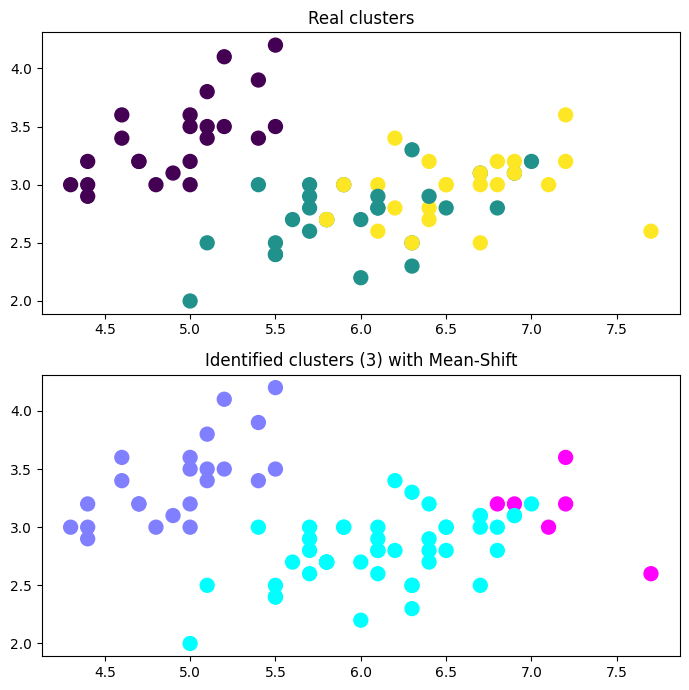

In [63]:
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.scatter(x_train[0], x_train[1], c=y_train, s=100)
plt.title('Real clusters')
plt.subplot(212)
plt.scatter(x_train[0], x_train[1], c=clusters, s=100, cmap='cool')
plt.title(f'Identified clusters ({len(set(clusters))}) with Mean-Shift')
plt.tight_layout()

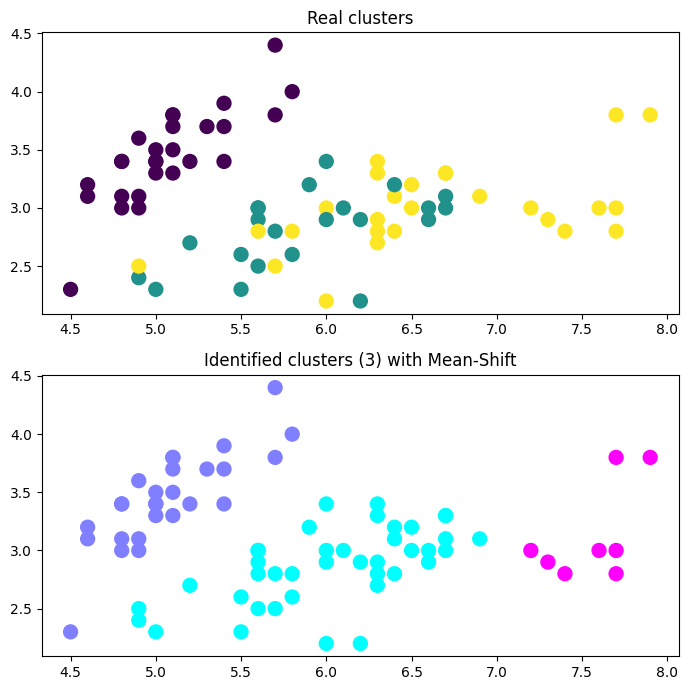

In [74]:
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.scatter(x_test[0], x_test[1], c=y_test, s=100)
plt.title('Real clusters')
plt.subplot(212)
plt.scatter(x_test[0], x_test[1], c=prediction, s=100, cmap='cool')
plt.title(f'Identified clusters ({len(set(prediction))}) with Mean-Shift')
plt.tight_layout()

### DbScan

In [104]:
dbscaner = DBSCAN(eps=0.4, min_samples=2)
dbscaner.fit(x_train)

DBSCAN(eps=0.4, min_samples=2)

In [105]:
clusters = dbscaner.labels_

In [106]:
dbscaner

DBSCAN(eps=0.4, min_samples=2)

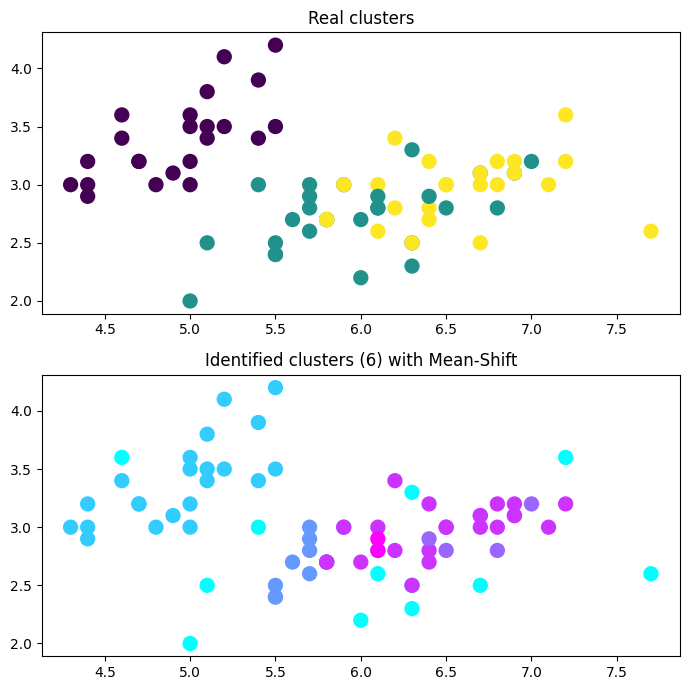

In [107]:
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.scatter(x_train[0], x_train[1], c=y_train, s=100)
plt.title('Real clusters')
plt.subplot(212)
plt.scatter(x_train[0], x_train[1], c=clusters, s=100, cmap='cool')
plt.title(f'Identified clusters ({len(set(clusters))}) with Mean-Shift')
plt.tight_layout()

In [ ]:
### DBSCAN no tiene un mindset para realizar una clusterizacion predictiva
### para eso mejor usar hdbscan. 